In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.cross_validation import train_test_split
from sklearn import datasets
from sklearn.feature_selection import RFE
from imblearn.over_sampling import SMOTE, ADASYN

from datetime import datetime

/Users/dkera/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#Load Dataset for training
df = pd.read_csv('train.csv')

In [3]:
df.shape

(76292, 14)

In [4]:
df['target'].value_counts()

0    72343
1     3949
Name: target, dtype: int64

In [5]:
df['date'] = pd.to_datetime(df['date'])
df['departure_date']=pd.to_datetime(df['departure_date'])
df['diff'] = (df['departure_date'] - df['date']).dt.days



In [6]:
df['diff']

0          5
1        127
2         10
3          5
4          6
5         30
6         68
7         16
8         16
9         13
10         6
11        24
12        20
13        60
14        18
15        15
16        44
17        18
18         1
19         0
20         3
21        29
22        11
23        29
24         0
25       215
26       148
27        24
28         5
29       137
        ... 
76262     59
76263      7
76264    331
76265     30
76266    337
76267     59
76268    265
76269     21
76270     23
76271     56
76272    113
76273      3
76274      9
76275     58
76276     52
76277      9
76278     10
76279    163
76280    345
76281     21
76282     41
76283     21
76284     27
76285      1
76286     67
76287    188
76288     61
76289     54
76290     51
76291     51
Name: diff, dtype: int64

## Data visualisations
In this section we observe each feature vs the target. We want to know how many istances convert from each feature as well as in what ratio. So per feature we use to plots.

In [7]:
my_slice = df.ix[1:25,:]

In [8]:
my_slice

,id,date,origin_airport,destination_airport,flight_type,seat_class_code,adults,children,affiliate_id,journey_type,currency,departure_date,return_date,target,diff
1,2,2017-08-01,104,1193,1,2,1,0,1,0,9,2017-12-06,2017-12-12,0,127
2,3,2017-08-01,689,45,1,2,2,1,0,1,9,2017-08-11,2017-08-18,0,10
3,4,2017-08-01,619,720,1,2,1,0,2,1,23,2017-08-06,2017-08-21,0,5
4,5,2017-08-01,619,87,0,2,1,0,2,1,23,2017-08-07,NaN,1,6
5,6,2017-08-01,809,1106,0,2,1,0,2,0,23,2017-08-31,NaN,0,30
6,7,2017-08-01,552,701,1,2,2,0,1,2,9,2017-10-08,2017-11-17,0,68
7,8,2017-08-01,468,862,0,2,1,0,2,0,23,2017-08-17,NaN,0,16
8,9,2017-08-01,468,862,0,2,1,0,2,0,23,2017-08-17,NaN,0,16
9,10,2017-08-01,1007,1047,0,2,1,0,2,1,23,2017-08-14,NaN,0,13
10,11,2017-08-01,619,87,0,2,1,0,2,1,23,2017-08-07,NaN,0,6


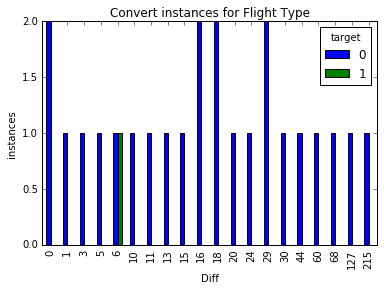

In [9]:
%matplotlib inline
pd.crosstab(my_slice['diff'],my_slice['target']).plot(kind='bar')
plt.title('Convert instances for Flight Type')
plt.xlabel('Diff')
plt.ylabel('instances')



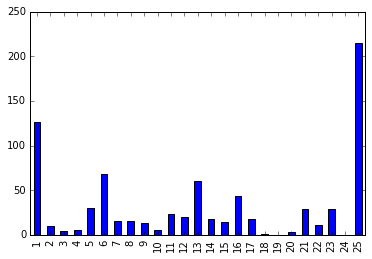

In [10]:
#diff=my_slice['diff']
#diff.plot.bar()

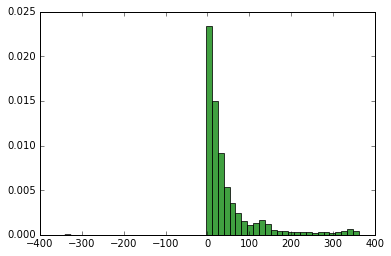

In [15]:
# the histogram of the data
import matplotlib.mlab as mlab

diff=df['diff']

n, bins, patches = plt.hist(diff, 50, normed=1, facecolor='green', alpha=0.75)

# add a 'best fit' line
#y = mlab.normpdf( bins, mu, sigma)
#l = plt.plot(bins, y, 'r--', linewidth=1)



plt.show()


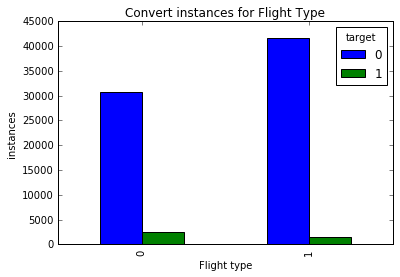

In [9]:
%matplotlib inline
pd.crosstab(df.flight_type,df.target).plot(kind='bar')
plt.title('Convert instances for Flight Type')
plt.xlabel('Flight type')
plt.ylabel('instances')



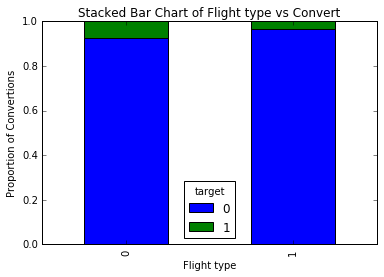

In [6]:
table=pd.crosstab(df.flight_type,df.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Flight type vs Convert')
plt.xlabel('Flight type')
plt.ylabel('Proportion of Convertions')

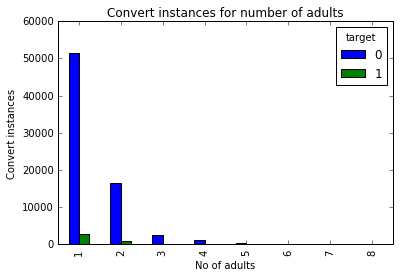

In [7]:
pd.crosstab(df.adults,df.target).plot(kind='bar')
plt.title('Convert instances for number of adults')
plt.xlabel('No of adults')
plt.ylabel('Convert instances')



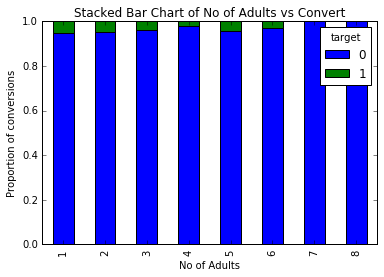

In [8]:
table=pd.crosstab(df.adults,df.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of No of Adults vs Convert')
plt.xlabel('No of Adults')
plt.ylabel('Proportion of conversions')

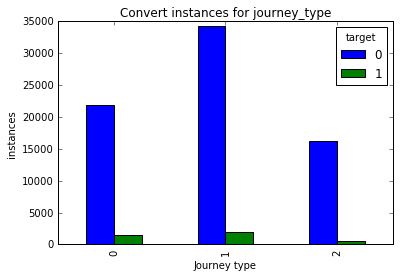

In [9]:
pd.crosstab(df.journey_type,df.target).plot(kind='bar')
plt.title('Convert instances for journey_type')
plt.xlabel('Journey type')
plt.ylabel('instances')

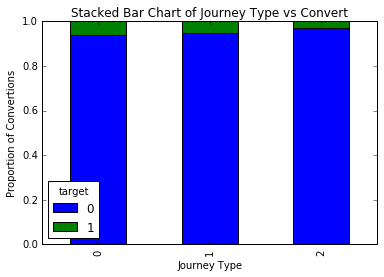

In [10]:
table=pd.crosstab(df.journey_type,df.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Journey Type vs Convert')
plt.xlabel('Journey Type')
plt.ylabel('Proportion of Convertions')

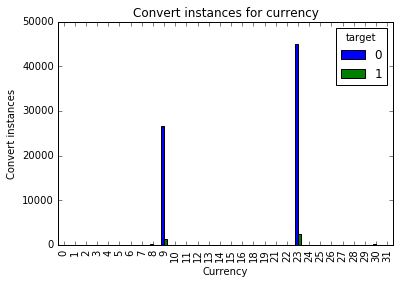

In [11]:
pd.crosstab(df.currency,df.target).plot(kind='bar')
plt.title('Convert instances for currency')
plt.xlabel('Currency')
plt.ylabel('Convert instances')

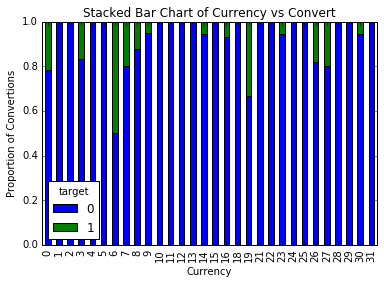

In [12]:
table=pd.crosstab(df.currency,df.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Currency vs Convert')
plt.xlabel('Currency')
plt.ylabel('Proportion of Convertions')

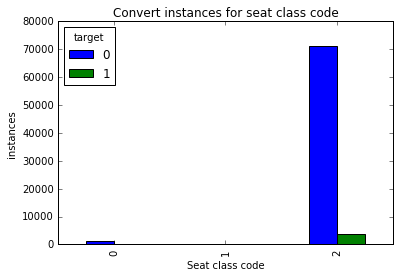

In [13]:
pd.crosstab(df.seat_class_code,df.target).plot(kind='bar')
plt.title('Convert instances for seat class code')
plt.xlabel('Seat class code')
plt.ylabel('instances')

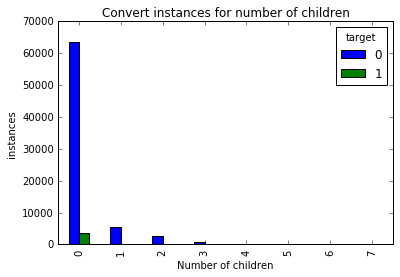

In [14]:
pd.crosstab(df.children,df.target).plot(kind='bar')
plt.title('Convert instances for number of children')
plt.xlabel('Number of children')
plt.ylabel('instances')

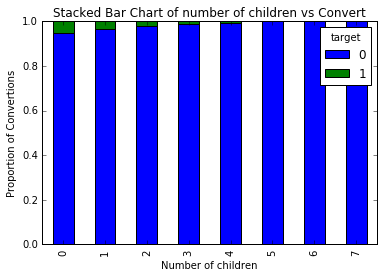

In [15]:
table=pd.crosstab(df.children,df.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of number of children vs Convert')
plt.xlabel('Number of children')
plt.ylabel('Proportion of Convertions')



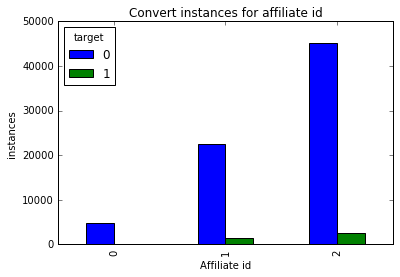

In [16]:
pd.crosstab(df.affiliate_id,df.target).plot(kind='bar')
plt.title('Convert instances for affiliate id')
plt.xlabel('Affiliate id')
plt.ylabel('instances')

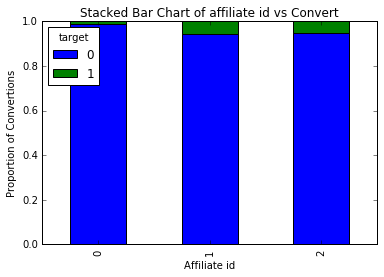

In [17]:
table=pd.crosstab(df.affiliate_id,df.target)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of affiliate id vs Convert')
plt.xlabel('Affiliate id')
plt.ylabel('Proportion of Convertions')




## Dummy variables
It is important to create dummy variables.

In [18]:
data1 = pd.get_dummies(df, columns =['flight_type','seat_class_code','adults','children','affiliate_id','journey_type','currency'])
data1.columns

Index([u'id', u'date', u'origin_airport', u'destination_airport',
       u'departure_date', u'return_date', u'target', u'flight_type_0',
       u'flight_type_1', u'seat_class_code_0', u'seat_class_code_1',
       u'seat_class_code_2', u'adults_1', u'adults_2', u'adults_3',
       u'adults_4', u'adults_5', u'adults_6', u'adults_7', u'adults_8',
       u'children_0', u'children_1', u'children_2', u'children_3',
       u'children_4', u'children_5', u'children_6', u'children_7',
       u'affiliate_id_0', u'affiliate_id_1', u'affiliate_id_2',
       u'journey_type_0', u'journey_type_1', u'journey_type_2', u'currency_0',
       u'currency_1', u'currency_2', u'currency_3', u'currency_4',
       u'currency_5', u'currency_6', u'currency_7', u'currency_8',
       u'currency_9', u'currency_10', u'currency_11', u'currency_12',
       u'currency_13', u'currency_14', u'currency_15', u'currency_16',
       u'currency_18', u'currency_19', u'currency_21', u'currency_22',
       u'currency_23', u'curren

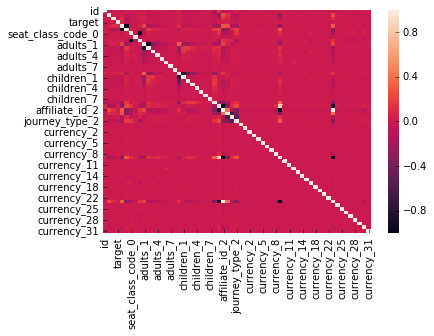

In [19]:
sns.heatmap(data1.corr())
plt.show()

In [20]:
data1.drop(data1.columns[[0,1,2,3, 4, 5]], axis=1, inplace=True)
data1.columns

Index([u'target', u'flight_type_0', u'flight_type_1', u'seat_class_code_0',
       u'seat_class_code_1', u'seat_class_code_2', u'adults_1', u'adults_2',
       u'adults_3', u'adults_4', u'adults_5', u'adults_6', u'adults_7',
       u'adults_8', u'children_0', u'children_1', u'children_2', u'children_3',
       u'children_4', u'children_5', u'children_6', u'children_7',
       u'affiliate_id_0', u'affiliate_id_1', u'affiliate_id_2',
       u'journey_type_0', u'journey_type_1', u'journey_type_2', u'currency_0',
       u'currency_1', u'currency_2', u'currency_3', u'currency_4',
       u'currency_5', u'currency_6', u'currency_7', u'currency_8',
       u'currency_9', u'currency_10', u'currency_11', u'currency_12',
       u'currency_13', u'currency_14', u'currency_15', u'currency_16',
       u'currency_18', u'currency_19', u'currency_21', u'currency_22',
       u'currency_23', u'currency_24', u'currency_25', u'currency_26',
       u'currency_27', u'currency_28', u'currency_29', u'currency_30

In [21]:
#Feature matrix and target
X = data1.iloc[:,1:]
y = data1.iloc[:,0]


In [23]:
X

,flight_type_0,flight_type_1,seat_class_code_0,seat_class_code_1,seat_class_code_2,adults_1,adults_2,adults_3,adults_4,adults_5,...,currency_22,currency_23,currency_24,currency_25,currency_26,currency_27,currency_28,currency_29,currency_30,currency_31
0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Feature Selection
As figured out from the plots the selected features will be the following list.

In [22]:

model = LogisticRegression()
rfe = RFE(model, 16)
rfe = rfe.fit(X, y )
print(rfe.support_)
print(rfe.ranking_)

[False  True  True False  True False False False  True False False  True
 False False False False  True  True False False False  True False False
 False False False  True False False False False False  True  True  True
 False False False False False False False False False  True False False
 False  True False  True  True False False False False]
[10  1  1 30  1 39 28 42  1 31  6  1 16  7 38 15  1  1 13 37 36  1 41 29 20
 19  4  1  3 34  2 12 17  1  1  1 24 35 22 40 26 27 21 11  8  1 18 14  5  1
 32  1  1 33  9 23 25]


## Selected features

In [23]:
cols=['flight_type_1','adults_2','adults_4','children_1','children_2','children_3','affiliate_id_1','affiliate_id_2','journey_type_2'] 
X_final=data1[cols]
y_final=data1['target']


## Classifier
We select a logistic classifier. Because the class 1 is minority we use a class weight.

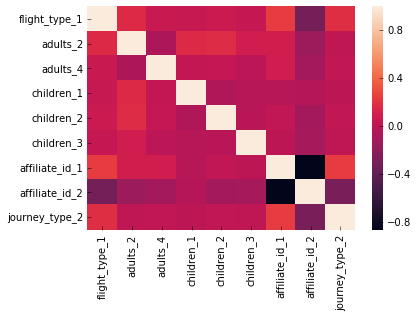

In [24]:
sns.heatmap(X_final.corr())
plt.show()

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(class_weight={1:10})
logreg.fit(X_final, y_final)


LogisticRegression(C=1.0, class_weight={1: 10}, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [44]:
logreg.score(X_final, y_final)

0.91068526188853349

In [28]:
y_pred = logreg.predict(X_final)
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_final, y_pred)
print(confusion_matrix)

[[69026  3317]
 [ 3497   452]]


In [29]:
from sklearn.metrics import classification_report
print(classification_report(y_final, y_pred))

             precision    recall  f1-score   support

          0       0.95      0.95      0.95     72343
          1       0.12      0.11      0.12      3949

avg / total       0.91      0.91      0.91     76292



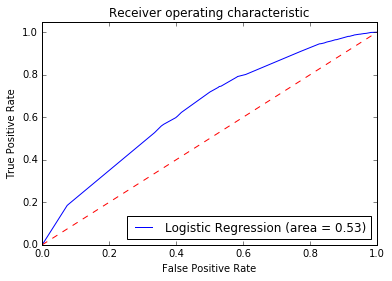

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_final, logreg.predict(X_final))
fpr, tpr, thresholds = roc_curve(y_final, logreg.predict_proba(X_final)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")

plt.show()

## Test Dataset
Now the trained classifier will work upon the test dataset.

In [31]:
test_data=pd.read_csv('test.csv')

In [32]:
data2 = pd.get_dummies(test_data, columns =['flight_type','seat_class_code','adults','children','affiliate_id','journey_type','currency'])
data2.columns

Index([u'id', u'date', u'origin_airport', u'destination_airport',
       u'departure_date', u'return_date', u'target', u'flight_type_0',
       u'flight_type_1', u'seat_class_code_0', u'seat_class_code_1',
       u'seat_class_code_2', u'adults_1', u'adults_2', u'adults_3',
       u'adults_4', u'adults_5', u'adults_6', u'adults_7', u'adults_8',
       u'children_0', u'children_1', u'children_2', u'children_3',
       u'children_4', u'children_5', u'children_6', u'affiliate_id_0',
       u'affiliate_id_1', u'affiliate_id_2', u'journey_type_0',
       u'journey_type_1', u'journey_type_2', u'currency_0', u'currency_1',
       u'currency_2', u'currency_3', u'currency_4', u'currency_5',
       u'currency_6', u'currency_7', u'currency_8', u'currency_9',
       u'currency_10', u'currency_11', u'currency_12', u'currency_13',
       u'currency_14', u'currency_15', u'currency_16', u'currency_17',
       u'currency_18', u'currency_19', u'currency_20', u'currency_21',
       u'currency_22', u'curre

In [33]:
cols=['flight_type_1','adults_2','adults_4','children_1','children_2','children_3','affiliate_id_1','affiliate_id_2','journey_type_2'] 

X_test=data2[cols]
y_test=data2['target']

In [34]:
y_pred = logreg.predict(X_test)
y_pred


array([1, 1, 0, ..., 0, 0, 0])

In [35]:
pred_pro = logreg.predict_proba(X_test)
print pred_pro

[[ 0.41534321  0.58465679]
 [ 0.41534321  0.58465679]
 [ 0.55259667  0.44740333]
 ..., 
 [ 0.51716327  0.48283673]
 [ 0.75616353  0.24383647]
 [ 0.57595874  0.42404126]]


## Add a new column with outcomes

In [36]:
y_pred=pd.DataFrame(y_pred) 

In [37]:
pred_pro=pd.DataFrame(pred_pro) 

In [38]:
test_data['target']=y_pred

In [39]:
test_data

,id,date,origin_airport,destination_airport,flight_type,seat_class_code,adults,children,affiliate_id,journey_type,currency,departure_date,return_date,target
0,69549,2017-09-01,136,520,0,2,2,0,1,0,9,2017-11-07,NaN,1
1,69550,2017-09-01,136,520,0,2,2,0,1,0,9,2017-11-07,NaN,1
2,69551,2017-09-01,619,645,0,2,1,0,2,0,23,2017-09-15,NaN,0
3,69552,2017-09-01,531,1208,1,2,2,1,2,1,23,2017-09-12,2017-09-28,0
4,69553,2017-09-01,552,969,1,2,2,0,1,1,9,2018-08-01,2018-08-08,0
5,69554,2017-09-01,434,1123,1,2,1,0,0,1,9,2017-09-01,2017-09-04,0
6,69555,2017-09-01,539,321,1,2,2,2,1,2,9,2018-07-31,2018-08-22,0
7,69556,2017-09-01,576,1380,1,2,2,0,1,2,9,2018-04-30,2018-05-15,0
8,69557,2017-09-01,619,1185,0,2,1,0,2,1,23,2017-09-23,NaN,0
9,69558,2017-09-01,619,84,0,2,1,0,2,1,23,2017-09-30,NaN,0


In [40]:
test_data['target'].value_counts()

0    74254
1     4914
Name: target, dtype: int64

## Bonus Exercise

In [41]:
test_data.to_csv('test_annotated.csv')


In [42]:
logreg.score(X_test, y_pred)

1.0